# Analysis of air pollution time series
## The deliverables
Visualization of pollutant concentrations measured in Hamburg in years 2013-2019

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import folium
from folium.plugins.measure_control import MeasureControl

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

%matplotlib inline

In [2]:
df_single = pd.read_csv("df_single.csv", index_col=0)
SensorLocationHH = pd.read_csv("SensorLocationHH.csv")

In [3]:
m = folium.Map(location=[53.5511, 9.9937], zoom_start=10)

c = MeasureControl()
c.add_to(m)

radius = 8

SensorLocationHH.apply(
    lambda x: folium.CircleMarker(
        location=[x["SensorLong"], x["SensorLat"]],
        radius=radius,
        stroke=False,
        color="black",
        weight=1,
        fill_opacity=0.6,
        opacity=1,
        fill_color="green",
        fill=False,
        popup=x["SensorID"],
        tooltip=x["SensorID"]).add_to(m), axis=1)
    
m

# Selecting measuring stations related to Diesel Ban:
Diesel ban in Hamburg (happened on 30.06.2017 targeted on reduce of NO2 emission, ban area is limited by Max-Brauer-Allee: between Julius-Leber-Straße/Max-Brauer-Allee and Holstenstraße/Max-Brauer-Allee, ca. 580 m (**DEHH070** station, data available for all yars except 2016); Stresemannstraße: between Kaltenkircher Platz/Stresemannstraße and Neuer Pferdemarkt, ca. 1.600 m (**DEHH064** and **DEHH026**, data available))
Concerning the diesel ban area, we can focus on these three measuring stations.

For plotting the data we expand *datetime* column to *year* and *day* (of the year) columns:

In [4]:
df_day_year = df_single
df_day_year['date'] = pd.to_datetime(df_day_year.index)
df_day_year['year'] = df_day_year['date'].dt.year
df_day_year['wday'] = df_day_year['date'].dt.weekday

Let's write some useful functions to make the visualization easy and efficient:

In [8]:
def pollutant_station_roll_avg(pollutant, station, avg_hours):
    """
    Returns avg_hours rolling average of given 
    pollutant concentration at given measuring station.
    """
    df_out = pd.DataFrame()
    df_out["wday"] = df_day_year["wday"]
    df_out["year"] = df_day_year["year"]
    column_name = station + "_" + pollutant + "_dataGroup1"
    df_out["Concentration"] = df_day_year[column_name].rolling(avg_hours).mean()
    return(df_out)

In [9]:
def plot_pollutant_station_roll_avg(pollutant, station, avg_hours):
    """
    Returns a Seaborn plot of avg_hours rolling average
    of given pollutant concentration at given measuring station.
    """
    plt.figure(figsize=(15, 7))
    out_plot = sns.lineplot(
    x="wday",
    y="Concentration",
    hue="year",
    data=pollutant_station_roll_avg(pollutant, station, avg_hours)).set_title(pollutant + " concentration at " + station + " measuring station, " + str(avg_hours) + " hours rolling average")
    return(out_plot)

Now let's plot **NO** concentration at three measuring stations nearby the diesel ban area, namely **DEHH070**, **DEHH064** and **DEHH026**:

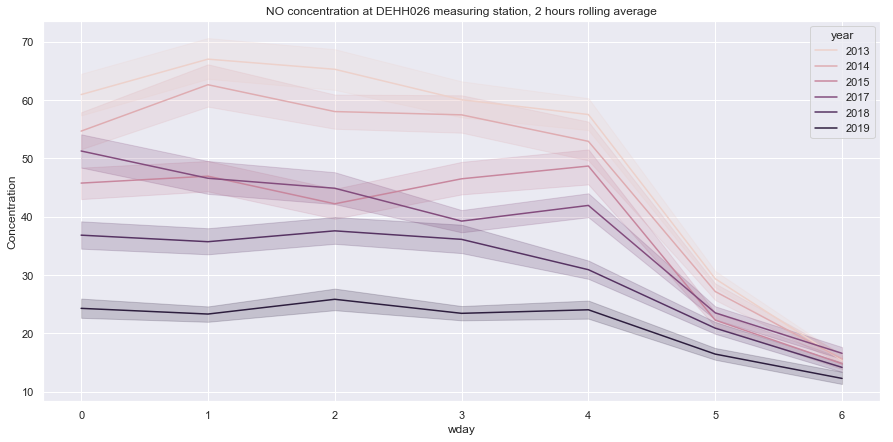

In [12]:
plot_pollutant_station_roll_avg("NO", "DEHH026", 2);

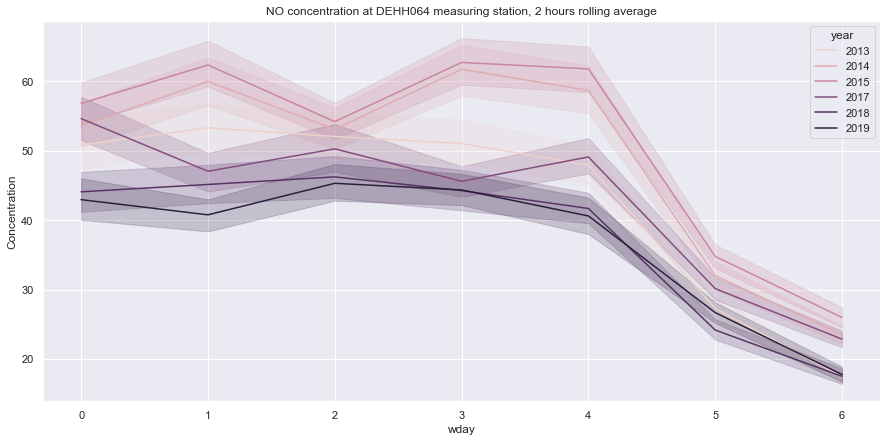

In [13]:
plot_pollutant_station_roll_avg("NO", "DEHH064", 2);

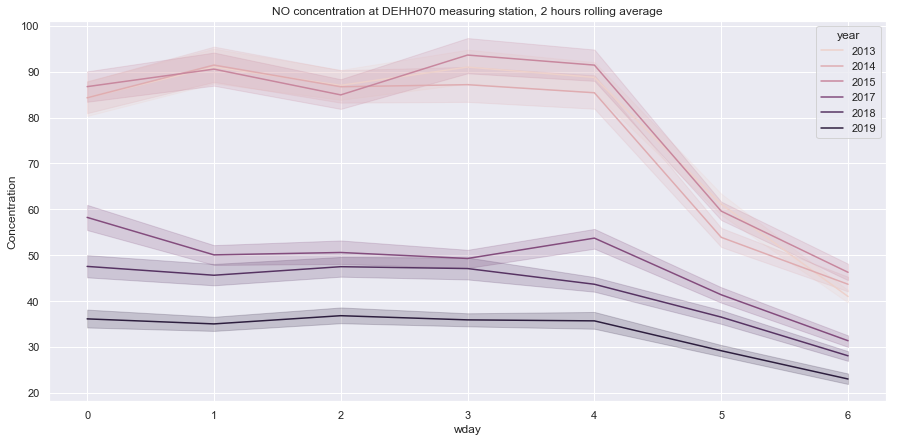

In [14]:
plot_pollutant_station_roll_avg("NO", "DEHH070", 2);

One can see pronounced effect at the **DE_HH_070** measuring station close to Julius-Leber-Straße/Max-Brauer-Allee crossing.

Let's plot the **NO2** concentrations at the same stations:

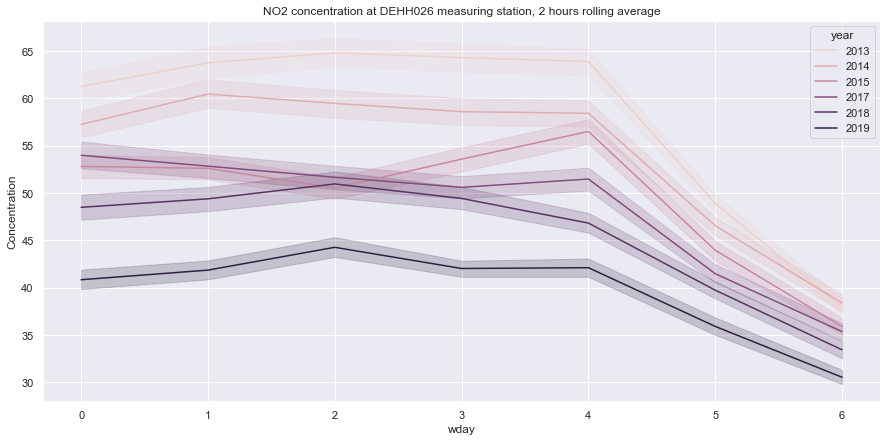

In [15]:
plot_pollutant_station_roll_avg("NO2", "DEHH026", 2);

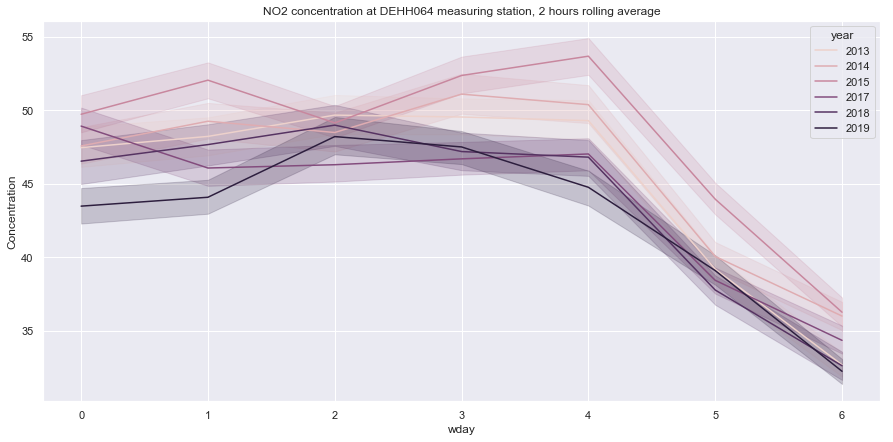

In [16]:
plot_pollutant_station_roll_avg("NO2", "DEHH064", 2);

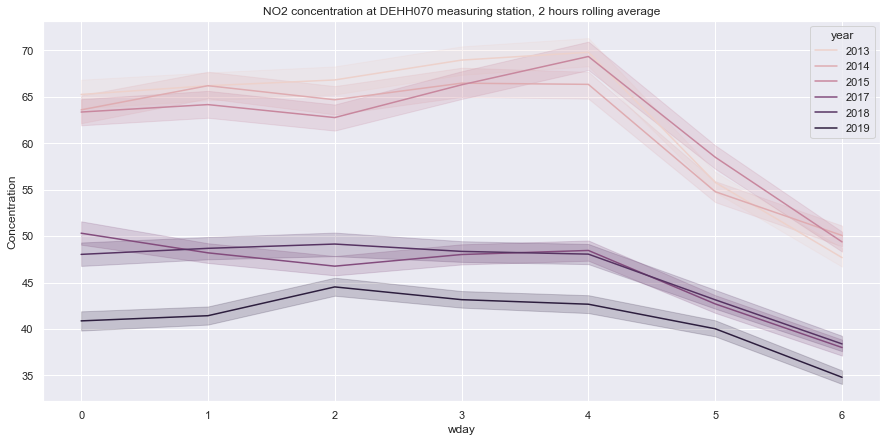

In [17]:
plot_pollutant_station_roll_avg("NO2", "DEHH070", 2);

On the plots above one can see qualitatively the same behavior as for the **NO** case: A gradual decrease of pollutant concentration versus year for **DEHH026** and **DEHH064** stations and pronounced concentration drop at the **DEHH070** station close to Julius-Leber-Straße/Max-Brauer-Allee crossing.

For comparison, let's make **NO2** concentration plots for three other measuring stations, located in dense populated areas away from the streets affected by diesel ban, namely **DEHH008**, **DEHH079** and **DEHH080**:

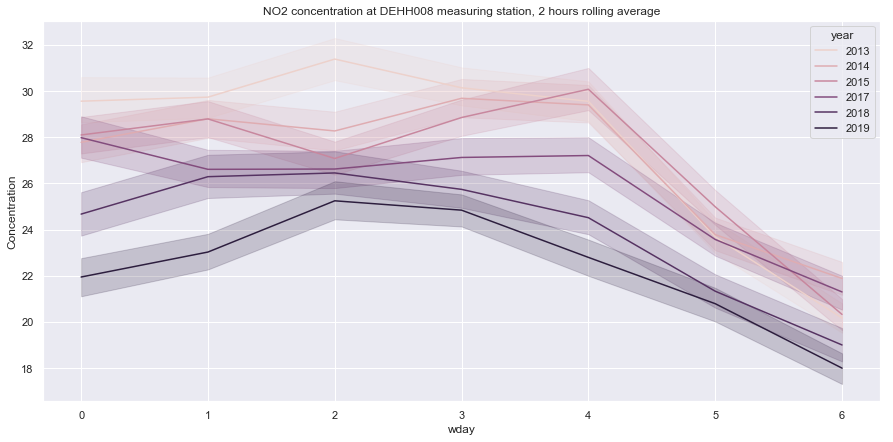

In [18]:
plot_pollutant_station_roll_avg("NO2", "DEHH008", 2);

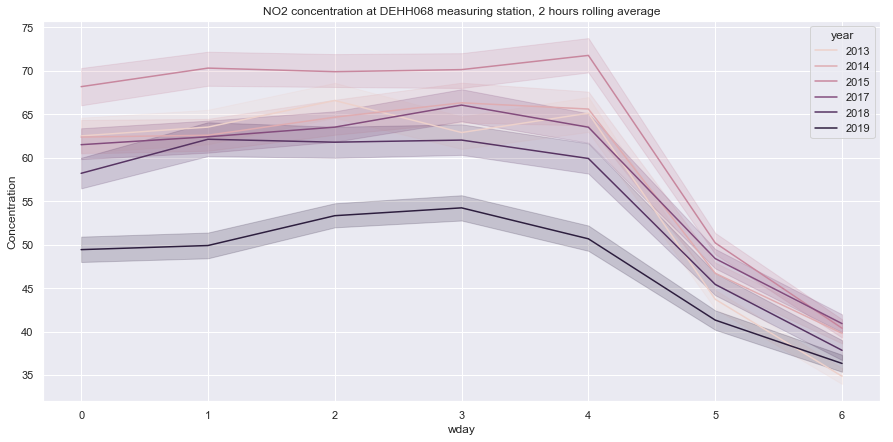

In [19]:
plot_pollutant_station_roll_avg("NO2", "DEHH068", 2);

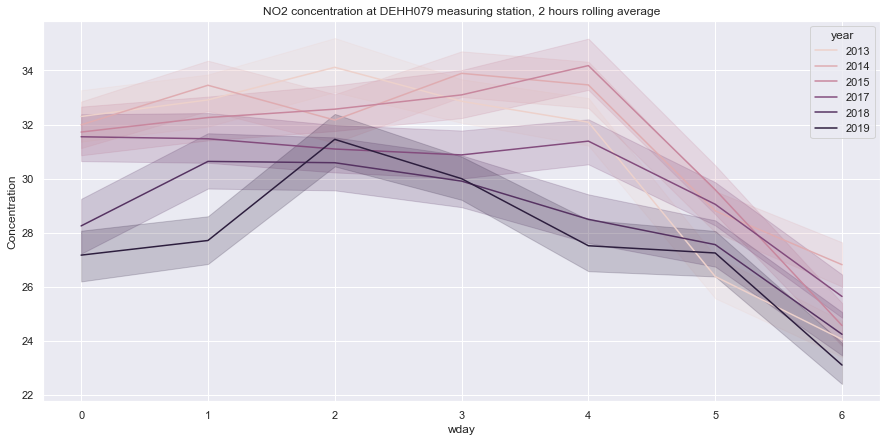

In [20]:
plot_pollutant_station_roll_avg("NO2", "DEHH079", 2);